In [2]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def add_watermark(image_path, watermark_text, output_path):
    # Open the original image
    img = Image.open(image_path).convert("RGBA")

    # Create a watermark image
    watermark = Image.new("RGBA", img.size, (0, 0, 0, 0))

    # Get a font
    font = ImageFont.load_default()

    # Initialize ImageDraw
    draw = ImageDraw.Draw(watermark)

    # Set the position and text of the watermark
    text_position = (10, 10)
    draw.text(text_position, watermark_text, font=font, fill=(255, 255, 255, 128))

    # Composite the watermark with the original image
    watermarked_img = Image.alpha_composite(img, watermark)

    # Convert back to RGB if needed
    watermarked_img = watermarked_img.convert("RGB")

    # Save the result
    watermarked_img.save(output_path)

    # Show the result
    watermarked_img.show()


add_watermark('../images/input_image.jpeg', 'Gaurav', '../images/watermarked.jpeg')

print('Watermark added successfully')


Watermark added successfully


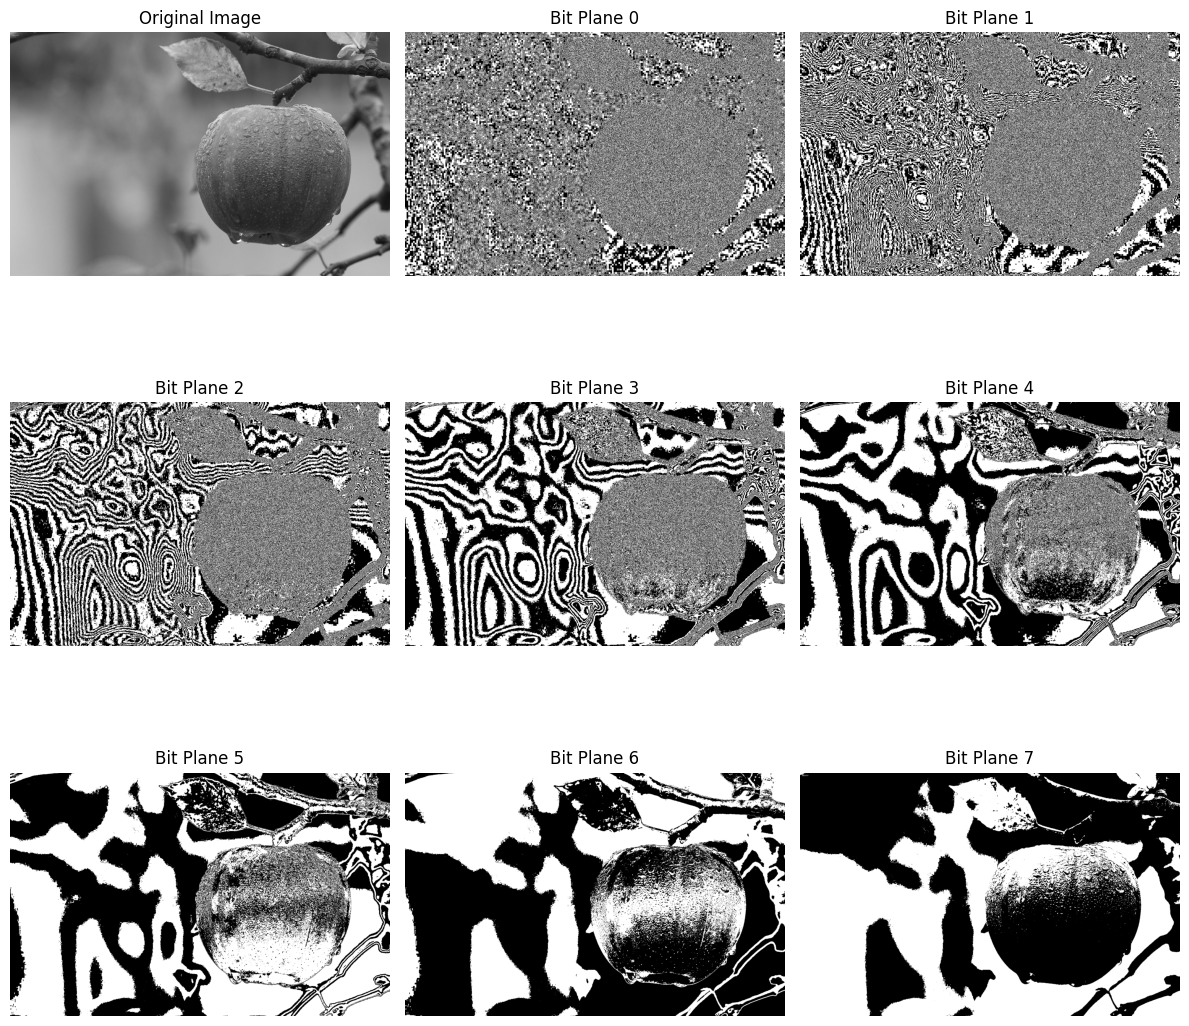

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('../images/watermarked.jpeg', cv2.IMREAD_COLOR)

# Check if the image was loaded properly
if image is None:
    print("Error: Image not loaded.")
    exit()

# Convert the image to grayscale using vectorized operations
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract bit planes using vectorized operations
bit_planes = [(gray_img >> i) & 1 for i in range(8)]
bit_planes = [bit_plane * 255 for bit_plane in bit_planes]

# Display the processed grayscale image and bit planes in subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(8):
    row = (i + 1) // 3
    col = (i + 1) % 3
    ax = axs[row, col]
    ax.imshow(bit_planes[i], cmap='gray')
    ax.set_title(f'Bit Plane {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()



In [4]:
from PIL import Image
import numpy as np

def extract_watermark(image_path, watermark_length):
    # Open the image and convert to RGB
    img = Image.open(image_path).convert("RGB")
    img_array = np.array(img)
    
    # Flatten the image array
    img_flat = img_array.flatten()
    
    # Extract the least significant bit of each pixel
    watermark_bin = ''.join(str(pixel & 1) for pixel in img_flat)
    
    # Convert binary string to characters
    watermark_chars = []
    for i in range(0, len(watermark_bin), 8):
        byte = watermark_bin[i:i+8]
        if len(byte) == 8:
            watermark_chars.append(chr(int(byte, 2)))
    
    # Join characters to form the watermark text
    watermark_text = ''.join(watermark_chars)
    
    # Trim to the actual watermark length if needed
    if len(watermark_text) > watermark_length:
        watermark_text = watermark_text[:watermark_length]
    
    # Print the extracted watermark
    print("Extracted Watermark:", watermark_text)

# Example usage
extract_watermark('../images/watermarked.jpeg', 6)  # Adjust watermark length based on your watermark


Extracted Watermark: àø À
